<h1><center>
    
# **Remaking the World through Machine Learning**
## PG Workshop

[<img src="UJLogo.jpg" width="250"/>](UJLogo.jpg)
</center></h1>

# K-Nearest Neighbours: Classification

This method can in fact be used for both regression and classification. The method assigns a class, or averages a prediction, by considering the $K$ nearest points to the one under consideration.

Here we consider a classification problem which was discussed at this [link.](<https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/?#>)

The data is accessible [here.](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

> An additional data-set ```Mall_Customers.csv``` has been provided. Once you are comfortable with the framework provided here, try to implement the kNN classification technique on this data set.

### 1. Import data and impute missing values

In [1]:
## Import data

import pandas as pd
df = pd.read_csv('train.csv')
df.head()
 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
## Impute missing values

df.isnull().sum()
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)
mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)
 

In [3]:
## Deal with categorical variables and drop the id columns

df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)
 

In [4]:
## Create train and test set

from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']



In [5]:
## Preprocessing – Scaling the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)
 


### 2. Train model

Let us have a look at the error rate for different values of $K$.

RMSE value for k=  1 is: 1524.7136237876898
RMSE value for k=  2 is: 1332.6368476995779
RMSE value for k=  3 is: 1279.9870584025693
RMSE value for k=  4 is: 1244.7268119949913
RMSE value for k=  5 is: 1233.5554290984946
RMSE value for k=  6 is: 1232.8568943950484
RMSE value for k=  7 is: 1229.1797018560817
RMSE value for k=  8 is: 1222.5454559923653
RMSE value for k=  9 is: 1217.1009909816203
RMSE value for k=  10 is: 1212.5696075830444
RMSE value for k=  11 is: 1217.4870241167616
RMSE value for k=  12 is: 1224.416496800278
RMSE value for k=  13 is: 1226.521788659046
RMSE value for k=  14 is: 1232.3449350970054
RMSE value for k=  15 is: 1237.781494720031
RMSE value for k=  16 is: 1242.5130797004
RMSE value for k=  17 is: 1250.8878712674355
RMSE value for k=  18 is: 1257.3076793432858
RMSE value for k=  19 is: 1259.2999015353266
RMSE value for k=  20 is: 1262.8550031768043


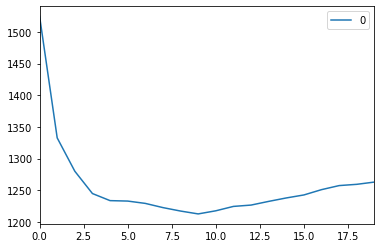

In [6]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()




As we discussed, when we take $K=1$, we get a very high RMSE value, while it decreases as we increase the value of $K$. At around $K= 7$, the RMSE is approximately at a minimum, and then rises once more for increasing $K$. Asu such, we may assume that $K=7$ will give us the best result in this case.


### 3. Predictions on the test dataset

Here predictions are made using our training dataset. 

In [7]:
#reading test and submission files
test = pd.read_csv('test.csv')
submission = pd.read_csv('SampleSubmission.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)

On submitting this file, I get an RMSE of 1279.5159651297.



### 4. Implementing GridsearchCV 

For deciding the value of $K$, plotting the elbow curve every time can be a cumbersome and tedious process. Let's consider the use of a Grid-search:


In [8]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 8}